<a href="https://colab.research.google.com/github/Yuri814/AIpython/blob/main/250523-250606_final_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**문제 1: 데이터 파일 열어보기**

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('Iris.csv')
display(iris)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**문제 2: 데이터 구경하기**
- 총 몇 개의 붓꽃 데이터가 있나요?
- 총 몇 개의 정보(열)가 있나요?

In [22]:
print(f'붓꽃 총 데이터 개수: {len(iris)}')
print(f'붓꽃 정보 수: {len(iris.columns)}')

iris.info()

붓꽃 총 데이터 개수: 150
붓꽃 정보 수: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  150 non-null    int64  
 1   SepalLengthCm       150 non-null    float64
 2   SepalWidthCm        150 non-null    float64
 3   PetalLengthCm       150 non-null    float64
 4   PetalWidthCm        150 non-null    float64
 5   Species             150 non-null    object 
 6   SepalArea           150 non-null    float64
 7   PetalArea           150 non-null    float64
 8   SepalLengthCm_Rank  150 non-null    float64
 9   PetalWidthCm_Rank   150 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 11.8+ KB


**문제 3: 각 열의 이름 확인하기**

In [4]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


**문제 4: 기본 정보 확인하기**
- 비어있는 값(null)이 있나요?
- 숫자로 된 열은 몇 개인가요?

In [5]:
iris_isnull = iris.isnull().sum()       # 컬럼별 결측치 개수 확인
print(iris_isnull)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
numeric_columns = iris.select_dtypes(include=['number'])
print(numeric_columns.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


**문제 5: 간단한 계산해보기**
- 꽃받침 길이의 평균은 얼마인가요?
- 꽃잎 너비의 최댓값은 얼마인가요?

In [7]:
#꽃받침 길이 평균
iris_mean = iris['SepalLengthCm'].mean()
print(f'꽃받침 길이 평균: {iris_mean.round(2)}')

#꽃잎 너비 최댓값
iris_max = iris['PetalWidthCm'].max()
print(f'꽃잎 너비 최댓값: {iris_max}')

꽃받침 길이 평균: 5.84
꽃잎 너비 최댓값: 2.5


**문제 6: 붓꽃 종류별로 개수 세기**
- 각 붓꽃 종류는 몇 개씩 있나요?
- 세 종류의 개수가 같나요?


In [8]:
iris_type = iris['Species'].value_counts()
print(iris_type)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


**문제 7: 특정 조건의 데이터 찾기**
- 꽃잎 길이가 2.0보다 큰 데이터는 몇 개인지 찾아보세요
- 꽃받침 너비가 3.5보다 큰 데이터를 찾아보세요


In [9]:
#꽃잎 길이 > 2.0
iris_PetalLengthCm_2 = (iris['PetalLengthCm'] > 2.0).sum()
print(f'꽃잎 길이가 2.0보다 큰 데이터: {iris_PetalLengthCm_2}')

#꽃받침 너비 > 3.5
iris_SepalWidthCm_3 = (iris['SepalWidthCm'] > 3.5).sum()
print(f'꽃받침 너비가 3.5보다 큰 데이터: {iris_SepalWidthCm_3}')


꽃잎 길이가 2.0보다 큰 데이터: 100
꽃받침 너비가 3.5보다 큰 데이터: 18


In [26]:
#강의내용 = iris 내의 PetalLengthCm에서 조건에 해당되는 데이터들을 필터링하여
#다시 데이터 프레임으로 만들어 주는 것
data1 = iris[iris['PetalLengthCm'] > 2.0]
print(f'꽃잎 길이가 2.0보다 큰 데이터: {len(data1)}')

data2 = iris[iris['SepalWidthCm'] > 3.5 ]
print(f'꽃받침 너비가 3.5보다 큰 데이터: {len(data2)}')


꽃잎 길이가 2.0보다 큰 데이터: 100
꽃받침 너비가 3.5보다 큰 데이터: 18


**문제 8: 특정 붓꽃 종류만 보기**
- ‘ris-versicolor' 종류만 골라서 평균 꽃잎 길이를 구해보세요
- 'Iris-virginica' 종류의 최대 꽃받침 너비를 찾아보세요

문제를 쪼개어서 생각하기!
먼저, 종류가 같은 것을 고르기(1단계), 이후에 평균을 구하기(2단계)

In [10]:
#‘ris-versicolor' 종류만 골라서 평균 꽃잎 길이
ris_versicolor = iris[iris['Species'] == 'Iris-versicolor']
ris_versicolor_mean = ris_versicolor['PetalLengthCm'].mean()
print(f'‘ris-versicolor’ 종류의 평균 꽃잎 길이: {ris_versicolor_mean.round(2)}')

#'Iris-virginica' 종류의 최대 꽃받침 너비
iris_virginica = iris[iris['Species'] == 'Iris-virginica']
iris_virginica_max = iris_virginica['SepalWidthCm'].max()
print(f'‘Iris-virginica’ 종류의 최대 꽃받침 너비: {iris_virginica_max}')

‘ris-versicolor’ 종류의 평균 꽃잎 길이: 4.26
‘Iris-virginica’ 종류의 최대 꽃받침 너비: 3.8


**문제 9: 첫 번째 그래프 그리기**
- 꽃잎 길이의 히스토그램도 그려보세요
- 어떤 구간에 데이터가 가장 많은지 관찰해보세요


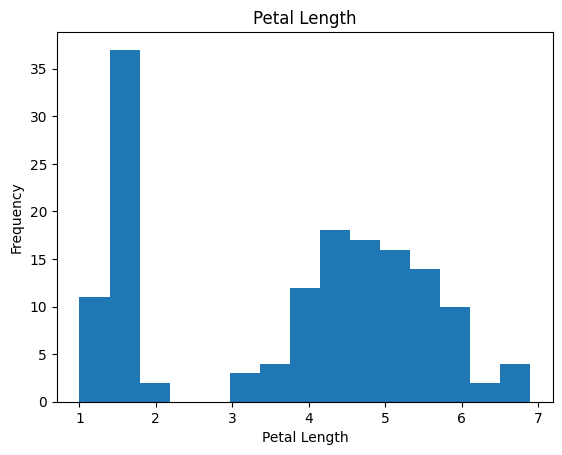

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(iris['PetalLengthCm'], bins=15) # 데이터, 구간(bin) 개수 설정
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.title('Petal Length')
plt.show()

Text(0.5, 1.0, 'Petal Length')

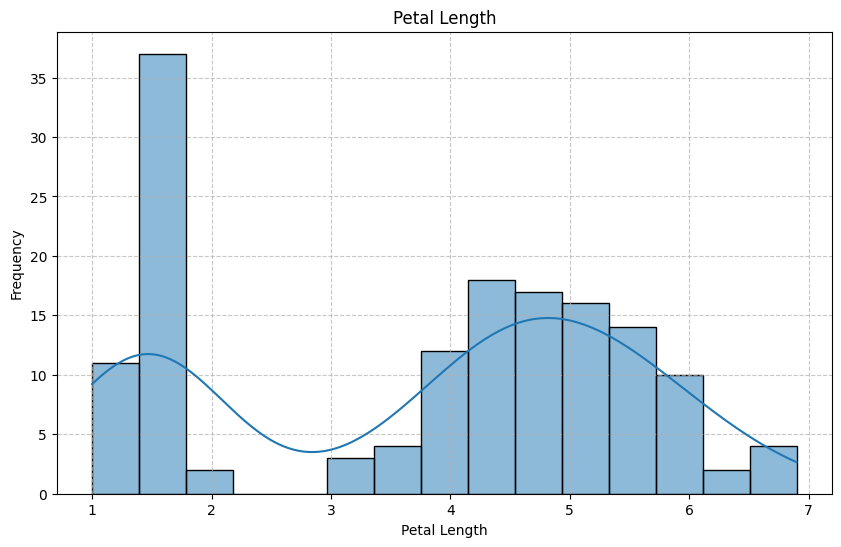

In [29]:
#또 다른 방법
plt.figure(figsize=(10, 6))
sns.histplot(data=iris, x='PetalLengthCm',bins=15, kde=True)
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Petal Length')

**문제 10: 산점도 그리기**
- 꽃잎 길이와 너비의 산점도도 그려보세요
- 길이가 길수록 너비도 넓어지는지 관찰해보세요

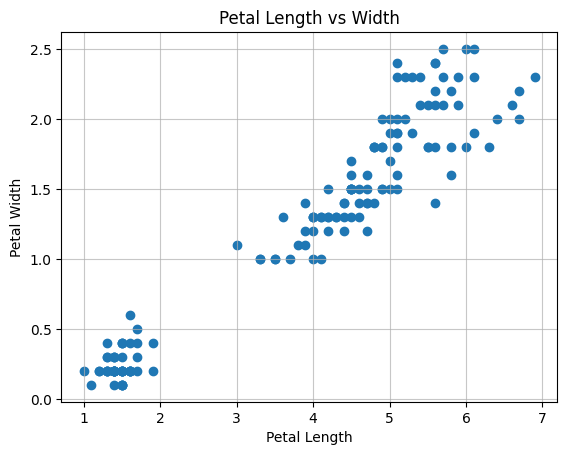

In [12]:
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.grid(True, alpha=0.7)
plt.show()

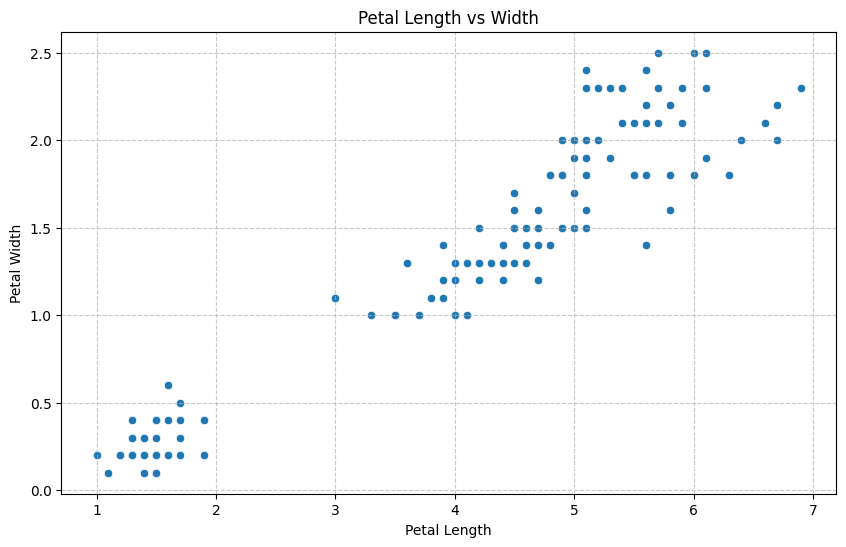

In [34]:
#또 다른 방법
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**문제 11: 붓꽃 종류별로 다른 색깔로 산점도 그리기**
- 어떤 종류가 가장 구별되어 보이나요?
- 서로 겹치는 종류가 있나요?


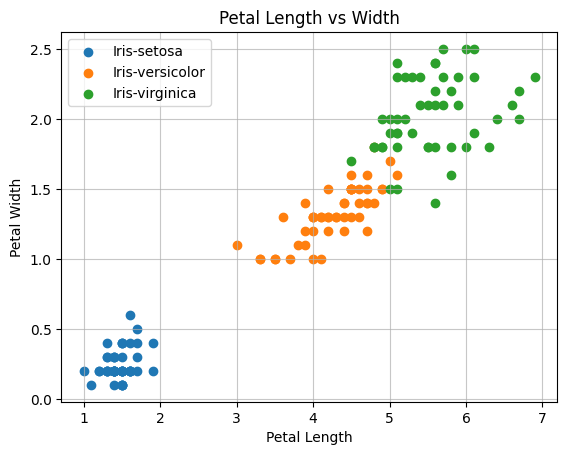

In [13]:
plt.scatter(iris[iris['Species'] == 'Iris-setosa']['PetalLengthCm'], iris[iris['Species'] == 'Iris-setosa']['PetalWidthCm'], label='Iris-setosa')
plt.scatter(iris[iris['Species'] == 'Iris-versicolor']['PetalLengthCm'], iris[iris['Species'] == 'Iris-versicolor']['PetalWidthCm'], label='Iris-versicolor')
plt.scatter(iris[iris['Species'] == 'Iris-virginica']['PetalLengthCm'], iris[iris['Species'] == 'Iris-virginica']['PetalWidthCm'], label='Iris-virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.legend()
plt.grid(True, alpha=0.7)
plt.show()

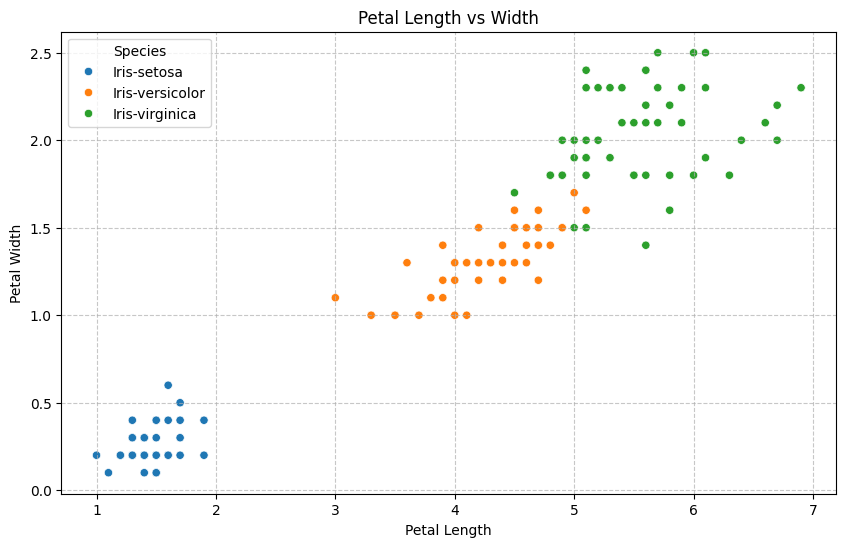

In [35]:
#또 다른 방법
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Width')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**문제 12: 종류별 평균 비교하기**
- 어떤 종류가 꽃받침이 가장 긴가요?
- 어떤 종류가 꽃잎이 가장 넓은가요?
- 결과를 표로 정리해보세요


In [15]:
# 붓꽃 종류별로 그룹화하고 각 열의 평균 계산
species_mean = iris.groupby('Species')[['SepalLengthCm', 'PetalWidthCm']].mean()

# 결과를 표 형태로 출력
print("붓꽃 종류별 평균 비교:")
print(species_mean)

붓꽃 종류별 평균 비교:
                 SepalLengthCm  PetalWidthCm
Species                                     
Iris-setosa              5.006         0.244
Iris-versicolor          5.936         1.326
Iris-virginica           6.588         2.026


**문제 13: 막대그래프로 평균 비교하기**
- 꽃잎 길이의 평균도 막대그래프로 그려보세요
- 가장 큰 차이를 보이는 측정값이 무엇인지 찾아보세요


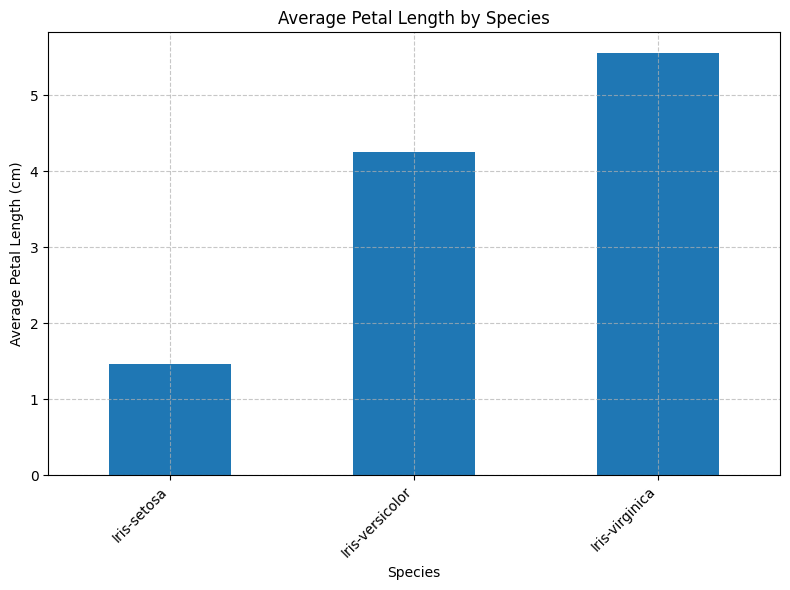

In [37]:
# 붓꽃 종류별 평균 꽃잎 길이 계산
PetalLengthCm_mean = iris.groupby('Species')['PetalLengthCm'].mean()

plt.figure(figsize=(8, 6))
PetalLengthCm_mean.plot(kind='bar')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Average Petal Length (cm)')
plt.xticks(rotation=45, ha='right') # x축 라벨 회전
plt.tight_layout() # 그래프 여백 조정
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


문제 14: 박스플롯으로 분포 비교하기
- 어떤 종류가 가장 넓은 범위의 값을 가지나요?
- 이상하게 튀는 값(점으로 표시)이 있나요?


<ipython-input-17-77efe75c4940>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


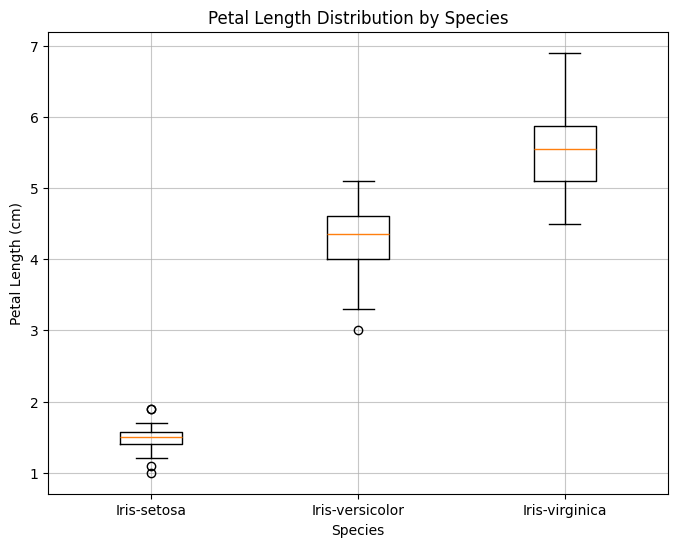

In [17]:
# 붓꽃 종류별 PetalLengthCm 값 리스트 생성
setosa_PL = iris[iris['Species'] == 'Iris-setosa']['PetalLengthCm']
versicolor_PL = iris[iris['Species'] == 'Iris-versicolor']['PetalLengthCm']
virginica_PL = iris[iris['Species'] == 'Iris-virginica']['PetalLengthCm']

data = [setosa_PL, versicolor_PL, virginica_PL]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Petal Length Distribution by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(True, alpha=0.7)
plt.show()

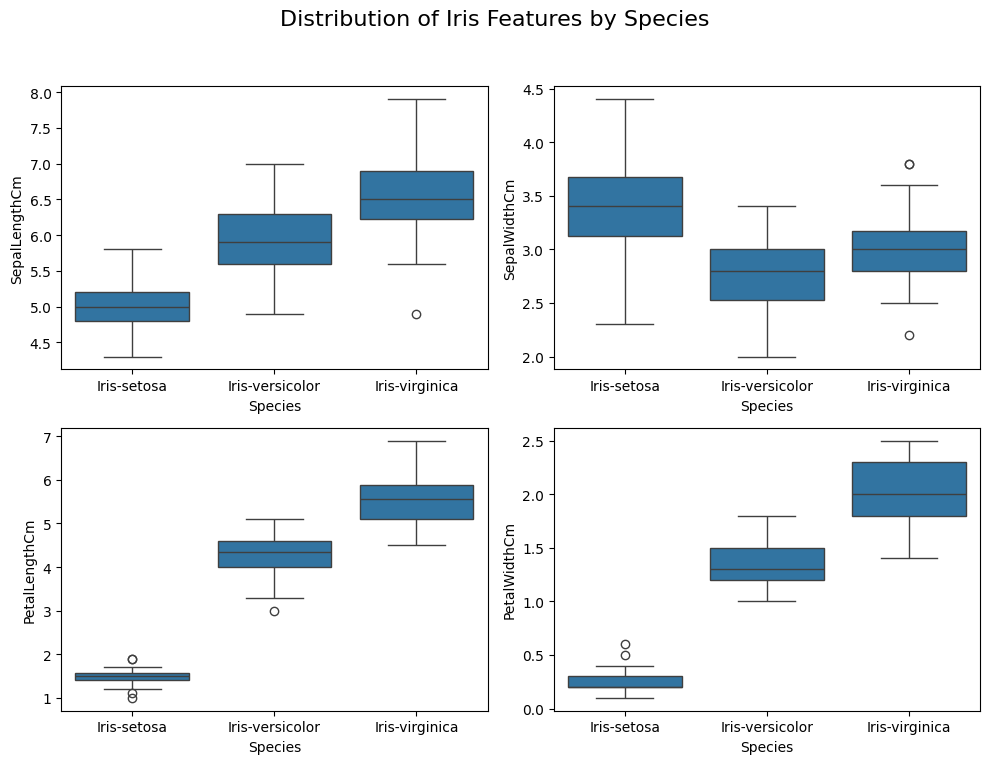

In [40]:
#또 다른 방법
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Distribution of Iris Features by Species', fontsize = 16)
sns.boxplot(ax=axes[0, 0], data=iris, x='Species', y='SepalLengthCm')
sns.boxplot(ax=axes[0, 1], data=iris, x='Species', y='SepalWidthCm')
sns.boxplot(ax=axes[1, 0], data=iris, x='Species', y='PetalLengthCm')
sns.boxplot(ax=axes[1, 1], data=iris, x='Species', y='PetalWidthCm')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

문제 15: 새로운 값 계산하기
- 어떤 종류가 꽃받침 면적이 가장 큰가요?
- 어떤 종류가 꽃잎 면적이 가장 큰가요?


In [18]:
# 꽃받침 면적 계산 및 추가
iris['SepalArea'] = iris['SepalLengthCm'] * iris['SepalWidthCm']

# 꽃잎 면적 계산 및 추가
iris['PetalArea'] = iris['PetalLengthCm'] * iris['PetalWidthCm']

# 붓꽃 종류별 평균 꽃받침 및 꽃잎 면적 계산
species_area_mean = iris.groupby('Species')[['SepalArea', 'PetalArea']].mean()

# 결과 출력
print("붓꽃 종류별 평균 면적 비교:")
print(species_area_mean)

# 어떤 종류의 꽃받침 면적이 가장 큰가요?
print("\n꽃받침 면적이 가장 큰 종류:")
print(species_area_mean['SepalArea'].idxmax())

# 어떤 종류의 꽃잎 면적이 가장 큰가요?
print("\n꽃잎 면적이 가장 큰 종류:")
print(species_area_mean['PetalArea'].idxmax())

붓꽃 종류별 평균 면적 비교:
                 SepalArea  PetalArea
Species                              
Iris-setosa        17.2088     0.3628
Iris-versicolor    16.5262     5.7204
Iris-virginica     19.6846    11.2962

꽃받침 면적이 가장 큰 종류:
Iris-virginica

꽃잎 면적이 가장 큰 종류:
Iris-virginica


In [41]:
#또 다른 방법
iris_df_area = iris.copy()
#꽃받침 면적 계산
iris_df_area['SepalArea'] = iris_df_area['SepalLengthCm'] * iris_df_area['SepalWidthCm']
iris_df_area

#꽃잎 면적 계산
iris_df_area['PetalArea'] = iris_df_area['PetalLengthCm'] * iris_df_area['PetalWidthCm']
iris_df_area

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea,SepalLengthCm_Rank,PetalWidthCm_Rank
0,1,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,15.0,17.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,31.0,17.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,40.0,17.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,42.0,17.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,23.0,17.0
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,20.10,11.96,18.0,7.0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,15.75,9.50,32.0,30.0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,19.50,10.40,23.0,24.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,21.08,12.42,38.0,7.0


문제 16: 데이터 필터링
- 꽃받침 너비가 3.0 이상이고 꽃잎 너비가 1.5 이상인 데이터를 찾아보세요
- 그 데이터들은 주로 어떤 종류인가요?


In [19]:
#꽃받침 너비 >= 3.0 and 꽃잎 너비 >= 1.5
# 조건에 맞는 행을 나타내는 boolean Series 생성
filter_condition = (iris['SepalWidthCm'] >= 3.0) & (iris['PetalWidthCm'] >= 1.5)

# 조건에 맞는 데이터의 개수를 출력 (선택 사항)
iris_SW3_PW1_count = filter_condition.sum()
print(f'꽃받침 너비가 3.0 이상이고 꽃잎 너비가 1.5 이상인 데이터: {iris_SW3_PW1_count}')

# 조건에 맞는 데이터 필터링
filtered_iris = iris[filter_condition]

# 필터링된 데이터에서 종별 개수 계산
species_counts = filtered_iris.groupby('Species').size()

# 결과 출력
print("\n꽃받침 너비 3.0 이상, 꽃잎 너비 1.5 이상 데이터의 종별 개수:")
print(species_counts)

꽃받침 너비가 3.0 이상이고 꽃잎 너비가 1.5 이상인 데이터: 39

꽃받침 너비 3.0 이상, 꽃잎 너비 1.5 이상 데이터의 종별 개수:
Species
Iris-versicolor    10
Iris-virginica     29
dtype: int64


In [45]:
#또 다른 방법
data3 = iris[(iris['SepalWidthCm'] >= 3.0) & (iris['PetalWidthCm'] >= 1.5)]
filtered_species_counts = data3['Species'].value_counts()
print(filtered_species_counts)

Species
Iris-virginica     29
Iris-versicolor    10
Name: count, dtype: int64


문제 17: 순위 매기기
- top 10에 가장 많이 포함된 종류는?
- 가장 적게 포함된 종류는?

In [47]:
top10_sepal_length = iris.sort_values(by='SepalLengthCm', ascending=False).head(10)
top10_sepal_length


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea,SepalLengthCm_Rank,PetalWidthCm_Rank
131,132,7.9,3.8,6.4,2.0,Iris-virginica,30.02,12.80,1.0,24.0
122,123,7.7,2.8,6.7,2.0,Iris-virginica,21.56,13.40,2.0,24.0
118,119,7.7,2.6,6.9,2.3,Iris-virginica,20.02,15.87,2.0,7.0
117,118,7.7,3.8,6.7,2.2,Iris-virginica,29.26,14.74,2.0,15.0
135,136,7.7,3.0,6.1,2.3,Iris-virginica,23.10,14.03,2.0,7.0
105,106,7.6,3.0,6.6,2.1,Iris-virginica,22.80,13.86,6.0,18.0
130,131,7.4,2.8,6.1,1.9,Iris-virginica,20.72,11.59,7.0,30.0
107,108,7.3,2.9,6.3,1.8,Iris-virginica,21.17,11.34,8.0,35.0
109,110,7.2,3.6,6.1,2.5,Iris-virginica,25.92,15.25,9.0,1.0
129,130,7.2,3.0,5.8,1.6,Iris-virginica,21.60,9.28,9.0,47.0


In [48]:
top10_petal_width = iris.sort_values(by='PetalWidthCm', ascending=False).head(10)
top10_petal_width

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalArea,PetalArea,SepalLengthCm_Rank,PetalWidthCm_Rank
144,145,6.7,3.3,5.7,2.5,Iris-virginica,22.11,14.25,18.0,1.0
109,110,7.2,3.6,6.1,2.5,Iris-virginica,25.92,15.25,9.0,1.0
100,101,6.3,3.3,6.0,2.5,Iris-virginica,20.79,15.00,32.0,1.0
114,115,5.8,2.8,5.1,2.4,Iris-virginica,16.24,12.24,45.0,4.0
136,137,6.3,3.4,5.6,2.4,Iris-virginica,21.42,13.44,32.0,4.0
140,141,6.7,3.1,5.6,2.4,Iris-virginica,20.77,13.44,18.0,4.0
118,119,7.7,2.6,6.9,2.3,Iris-virginica,20.02,15.87,2.0,7.0
115,116,6.4,3.2,5.3,2.3,Iris-virginica,20.48,12.19,27.0,7.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,21.08,12.42,38.0,7.0
145,146,6.7,3.0,5.2,2.3,Iris-virginica,20.10,11.96,18.0,7.0
